In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle

# **Data Cleanup**

In [2]:
df = pd.read_csv('mushrooms.csv')

In [5]:
# Check for missing values
missing_values = df.isin(['?']).sum()
print("Missing values per feature:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

# Replace '?' in 'stalk-root' with NaN
clean_df = df.copy()
clean_df['stalk-root'] = clean_df['stalk-root'].replace('?', np.nan)

# Drop columns with no variability or that introduce leakage
clean_df = clean_df.drop(columns=['veil-type', 'odor', 'gill-color', 'spore-print-color'])

# Encode target: 'e' -> 0 (edible), 'p' -> 1 (poisonous)
clean_df['class'] = clean_df['class'].map({'e': 0, 'p': 1})

# Separate features and labels
X = clean_df.drop('class', axis=1)
y = clean_df['class']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Shuffle the entire dataset
X_shuffled, y_shuffled = shuffle(X_encoded, y, random_state=42)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_shuffled, y_shuffled, test_size=0.20, random_state=42, stratify=y_shuffled
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Missing values per feature:
 stalk-root    2480
dtype: int64
Duplicate rows: 0
Train shape: (6499, 85)
Test shape: (1625, 85)


# **Machine Learning**

Test Accuracy: 1.000


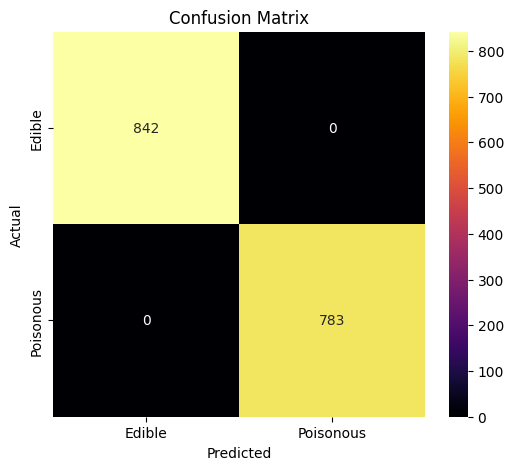

In [8]:
# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy:.3f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno",
            xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()